# BM 336027 - Technion - Medical Image Processing


## Homework 1 - Image Histograms & Filters 
---

### <a style='color:red'> Due Date: 23.11.2022 </a>

---
###  Agenda

* [Exercise 0: Color Conversion](#Exercise-0)
* [Exercise 1: Histogram Equalization](#Exercise-1)
* [Exercise 2: Convolution & Filters](#Exercise-2)
* [Exercise 3: Bilateral Filter](#Exercise-3)

#### Use as many cells as you need

---
### Students Information

* Fill in


|              Name |             Id |             email |
|-------------------|----------------|------------------ |
|  [Shahar Rashty]  | [312465305]    |[rashty@campus.technion.ac.il] |


---
### Submission Guidelines

* **No handwritten submissions.** 
* What you have to submit:
    * You should submit this file only, with the name: `bm_hw1_id.ipynb`.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).


---

In [1]:
# imports you will need
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

### **Assignment Instructions**
**In this assignment, you are allowed to use only basic numpy and matplotlib functions, and functions you implemented in other sections of the exercises**

---

###  Exercise 0

In this exercise, we want to convert an RGB image to a grayscale image. 

1. Implement the function `rgb2gray_mean` that takes in a three-channel RGB image in the form of a numpy array and returns a grayscale image which is the average value of the three channels (red, green, and blue) <br>
    Ensure that your function can be configured with channels first (3, H, W) or last (H, W, 3). <br>
    Write a description of your function and explain its inputs and output

In [2]:
def rgb2gray_mean(img: np.ndarray) -> np.ndarray:
    '''
    Add your description and complete the inputs (params) and output (return).
    
    :param img:  a three-channel RGB image , np.ndarray
    :return img_gray:a grayscale image which is the average value of the three channels of img , np.ndarray
    '''
    if len(img.shape)==2: # img is already grayed!!
        img_gray = img
        return img_gray
    elif len(img.shape)==3:
        if img.shape[0]==3: #colors chanel first
            img = np.moveaxis(img, -1, 0) # will transform to - colors chanel last    
    img_gray = np.mean(img, -1)        
    return img_gray


In [3]:
def rgb2gray_weighted(img: np.ndarray) -> np.ndarray:
    '''
    convert img to a grayscale image which is the weighted average of the three channels of img 𝑌=0.2125⋅𝑅+0.7154⋅𝐺+0.0721⋅𝐵
    
    
    :param img:  a three-channel RGB image , np.ndarray 
    :return img_gray:a grayscale image , np.ndarray
    '''
    if len(img.shape)==2: # img is already grayed!!
        img_gray = img
        return img_gray
    elif img.shape[0]==3: #colors chanel first
        img = np.moveaxis(img, -1, 0) # will transform to -> colors chanel last 
        
    img_gray = img.copy()
            
    r , g , b = img[:, :, 0] , img[:, :, 1] ,img[:, :, 2]
    img_gray=0.2125*r+0.7154*g+0.0721*b 
            
    return img_gray
    

2. Averaging all the channels may not be the best way to apply this conversion. A more "human-oriented" way is taking the weighted average of the three channels according to the following equation:
$$ Y = 0.2125\cdot R + 0.7154\cdot G + 0.0721\cdot B $$
    look [here](https://www.baeldung.com/cs/convert-rgb-to-grayscale) for more information. <br>
    
    Implement the function `rgb2gray_weighted` that takes in a three-channel RGB image in the form of a numpy array and returns a grayscale image according to the above equation.<br>
    Ensure that your function can be configured with channels first (3, H, W) or last (H, W, 3). <br>
    Write a description of your function and explain its inputs and output.

3. Load the colored image 'retina.jpg' and convert it to grayscale using the above two functions you implemented.<br>
    Display the colored image and the two grayscaled images in one figure and add titles.

(192, 194, 3)
(192, 194)
(192, 194)


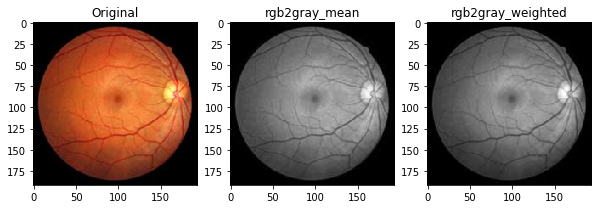

In [4]:
img = plt.imread('retina.jpg')
grayed_mean = rgb2gray_mean(img)
grayed_weighted = rgb2gray_weighted(img)

print(img.shape)
print(grayed_weighted.shape)
print(grayed_mean.shape)

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 3, 1)
plt.imshow(img,cmap='gray')
plt.title("Original")

fig.add_subplot(1, 3, 2)
plt.imshow(grayed_mean,cmap='gray')
plt.title("rgb2gray_mean")

fig.add_subplot(1, 3, 3)
plt.imshow(grayed_weighted,cmap='gray')
plt.title("rgb2gray_weighted")

plt.show()


---

### Exercise 1

In many cases, you might get images that do not utilize the entire range of pixel values. <br> 
In these cases, the images will look too dim or too bright.   

First, we will implement a function that calculate the histogram of the image.<br>
**Do not use the function plt.hist() in this exersice.**<br>

1. Implement the function `img_hist_trivial` that receives an image as a uint8 numpy array and returns its histogram. Calcultat the histogram in the trivial way; going over the gray values and count them in the image.

    Write a description of your function and explain its inputs and output.


In [71]:
def img_hist_trivial(img: np.ndarray)-> np.ndarray:
    
    '''
     Calcultate the histogram of an img
    
    :param img: image as a uint8 numpy array 
    :return hist: histogram of the gray values of img as a np.ndarray
    '''
    hist_values = np.arange(256)
    hist = np.zeros(256)                    
    img = img.flatten()
    for val in hist_values:
        for pix in img:
            if pix==val:
                    hist[val]+=1
    
    return hist

In [72]:
# def img_hist_trivial(img: np.ndarray)-> np.ndarray:
    
#     '''
#      Calcultate the histogram of an img
    
#     :param img: image as a uint8 numpy array 
#     :return hist: histogram of the gray values of img as a np.ndarray
#     '''
# #     img = rgb2gray_weighted (img)
#     h = img.shape[0]
#     w = img.shape[1]
#     hist = np.zeros(256)
    
#     for x in range(h):
#         for y in range(w):
#             hist[img[x,y]] += 1             
    
#     return hist

2. What is the computational complexity of the above function? 

**Answer:**O(h* w * 256) , when h*w equals the number of pixels and we have 256 gray values

3. Implement the function `img_hist_advanced` that receives an image as a uint8 numpy array and returns its histogram. This time, calculate the histogram such the computational complexity is lower. Think of a way that you go over the image just once. 


In [73]:
def img_hist_advanced(img: np.ndarray)-> np.ndarray:
    
    '''
    Calculate the histogram of an img
    
    :param img:  image as a uint8 numpy array
    :return hist: histogram of img
    '''
    h = img.shape[0]
    w = img.shape[1]
    hist = np.zeros(256)
    img = img.ravel()
    for value in img:
        hist[value]+=1
    
    return hist


4. What is the computational complexity of the above function? 


**Answer:** O(h*w) , when h*w equals the number of pixels . we also decreased running time with vectoraization (flatten in compare to run 2 for loops to get all pixels of the image - as i did at comment out cell)

5. Load the image 'chest.jpg'. Measure the execution time of the functions `img_hist_trivial` and `img_hist_advanced` on that image.


In [74]:
import time

chest = plt.imread('chest.jpg')
tic = time.time()
img_hist_trivial(chest)
toc = time.time()
print(f"trivial runtime = {(toc - tic)*1000} mili seconds ")

tic = time.time()
img_hist_advanced(chest)
toc = time.time()
print(f"advanced runtime = {(toc - tic)*1000} mili seconds " )


trivial runtime = 101237.65707015991 mili seconds 
advanced runtime = 117.0053482055664 mili seconds 


6. Get the histogram of the cest image using one of the function you implemented. Display the image and its histogram. 
    Add titles to the figures and labels where is needed. <br> 

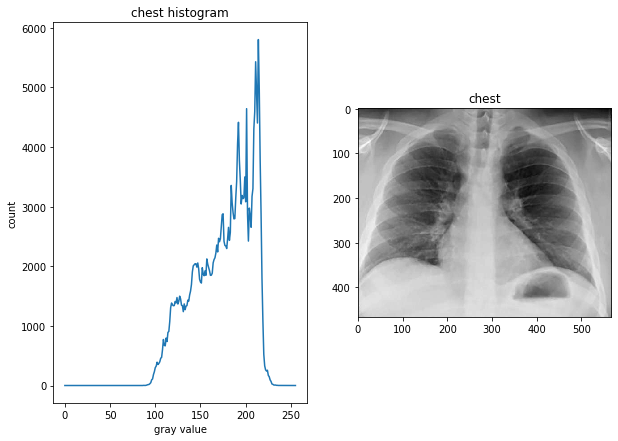

In [76]:
# chest_hist = img_hist_trivial(chest)
chest_hist = img_hist_advanced(chest)


fig3 = plt.figure(figsize=(10, 7))


fig3.add_subplot(1, 2, 2)
plt.imshow(chest,cmap='gray')
plt.title("chest")

fig3.add_subplot(1, 2, 1)
plt.plot(chest_hist)
plt.title('chest histogram')
plt.xlabel('gray value')
plt.ylabel('count')

plt.show()

7. Implement the funciton `hist_eq` that receives an image as a uint8 numpy array and performs histogram equalization on that image. The output image's data type has to be uint8 as well.  <br>
     Write a description of your function and explain its inputs and output.<br>
     **Do not use the function np.cumsum()**


In [9]:
def mycumsum(h):
    return np.asarray([sum(h[:i+1]) for i in range(len(h))])

In [11]:
def hist_eq(img: np.ndarray) -> np.ndarray:
    '''
    performs histogram equalization on img  
    
    :param img:   an input image as a uint8  np.ndarray
    :returm img_cum: an output image as a uint8   np.ndarray
    '''      
    hist=img_hist_advanced(img)
    sum_hist=mycumsum(hist)
    n = (sum_hist) * 256
    M = max(sum_hist)
    temp= np.round(n / M).astype('uint8')
    x,y=img.shape
    eq_img=np.zeros_like(img)
    
    for i in range(x):
        for j in range(y):
            eq_img[i,j]=temp[img[i,j]]
            
    return eq_img

8. Apply histogram equalization on the chest image using the function `hist_eq` and display the transformed image and its histogram using the function `img_hist_advanced` you've implemented. <br>
    Add titles to the figures and labels where is needed.


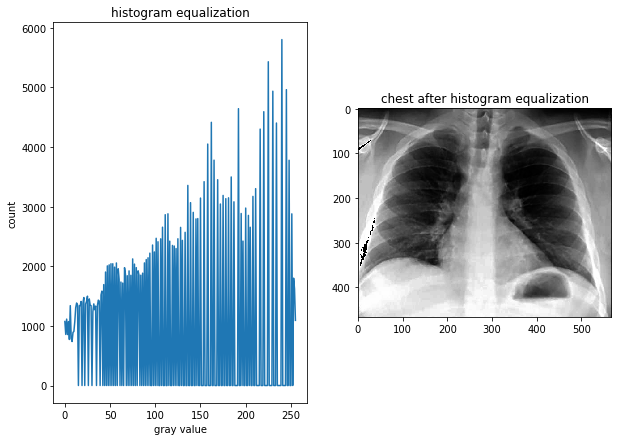

In [12]:
chest_eq = hist_eq(chest)
chest_histogram_eq = img_hist_trivial(chest_eq)

fig4 = plt.figure(figsize=(10, 7))

fig4.add_subplot(1, 2, 2)
plt.imshow(chest_eq,cmap='gray')
plt.title('chest after histogram equalization')

fig4.add_subplot(1, 2, 1)
plt.title('histogram equalization')
plt.plot(chest_histogram_eq)
plt.xlabel('gray value')
plt.ylabel('count')

plt.show()


9. Did you get a flat histogram after histogram equalization? Explain why yes or why not. 


**Answer:**
the histigram is not flat ,because i used descrete operations,  the values are spread throughout the whole range of gray values. 

10. Linear contrast stretching, histogram equalization, and CLAHE are all methods that aim to stretch out the intensity range. Explain the main differences between these methods and when one is preferred over the other.


**Answer:**
a transformation function which maps the input pixels in brighter region to output pixels in full region. That is what histogram equalization does.
CLAHE (Contrast Limited Adaptive Histogram Equalization) - image is divided into small blocks called "tiles" . Then each of these blocks are histogram equalized as usual.
When the values in the original image are expanded uniformly to fill the total range of the output device, the transformation is called linear contrast stretching.

CLAHE is usually better because its spread each small section difrently so we can notice more details and improve contrast in all parts of the image , not just bright\dark parts as in the other methods ,
as we saw at the lectures CLAHE gave us the best image for this image: 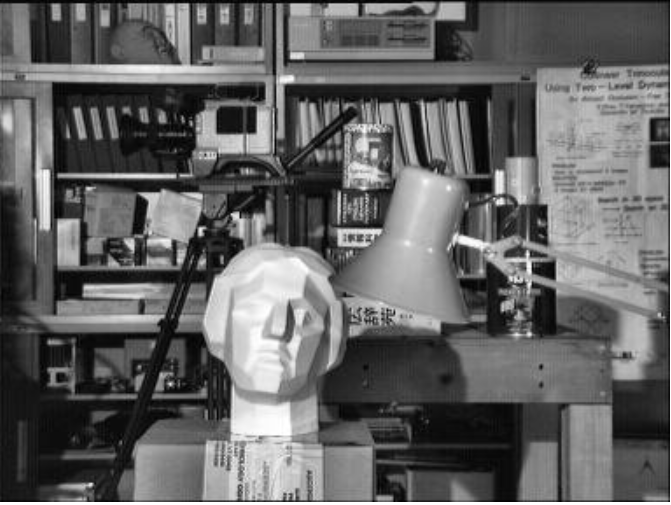


---

###  Exercise 2


1. Implement the function `conv2D` that takes in an image and a filter in the form of 2D numpy arrays, and returns the convolution product of the two arrays such that the output will have the same shape as the input image. <br>
    You can assume: zero padding, the image class is uint8, and the filter's shape is (k,k).<br>
    **Do not use the functions np.pad()**
    
     Write a description of your function and explain its inputs and output.


#### first i will implement a func to flip kernel from correlation to convulotion 

In [2]:
def kernel_transform(kernel: np.ndarray)-> np.ndarray:
    '''
    will transform kernel so convolution will be appllied and not correlation
    param kernel: np.ndarray of kernel 2D shape must be (k,k)
    '''
    img = kernel.copy()
    y = img.shape[0] 
    x = img.shape[1] 
    for i in range(y):
        for j in range(x):
            img[i][j]=kernel[y-i-1][x-j-1]
    return img

#### checking if kernel_transforn works:(yes it does!!)

In [7]:
b = np.array([3,4,5,1,0,2,-1,9,7]).reshape(3,3)
print(b)
kernel_transform(b)

[[ 3  4  5]
 [ 1  0  2]
 [-1  9  7]]


array([[ 7,  9, -1],
       [ 2,  0,  1],
       [ 5,  4,  3]])

In [14]:
x =  np.arange(1, 10).reshape(3,3)
y = kernel_transform(x)
print('correlation kernel =\n' ,x)
print('convulotion kernel =\n' ,y)

correlation kernel =
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
convulotion kernel =
 [[9 8 7]
 [6 5 4]
 [3 2 1]]


In [23]:
def conv2D(img: np.array, kernel: np.ndarray)-> np.ndarray:
    '''
    convolve the the 2D img with the 2D kernel
    
    :param img: np.ndarray of input image 2D
    :param kernel: np.ndarray of kernel 2D shape must be (k,k)
    :returm conv_img:np.ndarray output image  
    ''' 
    kernel = kernel_transform(kernel)
    img_h , img_w = img.shape[0:2]
    ker_h , ker_w = kernel.shape[0:2]
    
    h , w = ker_h//2 , ker_w//2
    
    conv_img = np.zeros(img.shape)
    
    for i in range(h , img_h - h):
        for j in range(w , img_w - w):
            sum = 0 
            for m in range (ker_h):
                for n in range (ker_w):
                    sum += kernel[m][n]*img[i-h+m][j-w+n]
            conv_img[i][j] = sum
   
    return conv_img

2.  Load the image 'retina_noisy.jpg' and apply 3X3 mean filter.<br>
    Display in one figure the original image, the filtered image and the difference between them. Add titels.

original img shape: (192, 194)
convolv img shape: (192, 194)
noise: (192, 194)


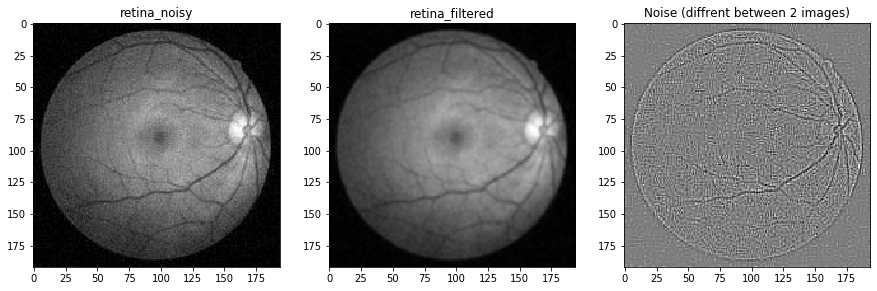

In [24]:
retina_noisy = plt.imread('retina_noisy.jpg')
kernel = 1/9 * np.ones((3,3))
retina_noisy_filtered = conv2D(retina_noisy,kernel)

noise = retina_noisy-retina_noisy_filtered

fig2 = plt.figure(figsize=(15, 7))

fig2.add_subplot(1, 3, 1)
plt.imshow(retina_noisy,cmap='gray')
plt.title("retina_noisy")
print('original img shape:',retina_noisy.shape)
fig2.add_subplot(1, 3, 2)
plt.imshow(retina_noisy_filtered,cmap='gray')
plt.title("retina_filtered")
print('convolv img shape:',retina_noisy_filtered.shape)

fig2.add_subplot(1, 3, 3)
plt.imshow(noise,cmap='gray')
plt.title("Noise (diffrent between 2 images)")
print('noise:',noise.shape)

plt.show()


3. What kind of noise would **not** be optimally filtered by a Gaussian or a bilateral filter and especially if the range variance parameter is low? how would you filter this noise?

**Answer:**
salt&paper noise will not be optimally filltered by Gaussian or bilateral foilter , we will prefer using median filter instead.

4. **Bonus:** (10 points)

    Another way to calculate the convolution product between an image and kernal is shifting the image instead of moving the kernel accros the image. 
Implemet the function `conv2D_shift_img` that takes in an image and a filter in the form of 2D numpy arrays, and returns the convolution product according to the above method.<br> 
The output should have the same shape as the input image.<br>
You can assume: zero padding, the image class is uint8, and the filter's shape is (k,k).

    Write a description of your function and explain its inputs and output.

In [17]:
def conv2D_shift_img(img: np.array, kernel: np.ndarray)-> np.ndarray:
    '''
    Add your description and complete the inputs (params) and output (return).
    
    :param img: 
    :param kernel: 
    :returm conv_img:  
    ''' 
    
    
    
    return conv_img


---

###  Exercise 3

1. Implement the function `bilateral_kernel` that takes in a region of an image and returns the value of its central pixel after filtering by a bilateral filter.<br>
    All images should be in an 8-bit format. Try to avoid using loops.    
     Write a description of your function and explain its inputs and output.


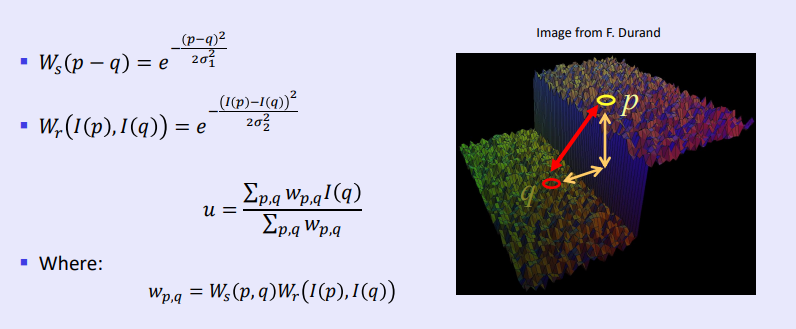

In [18]:
def bilateral_kernel(region: np.array, spatial_std: float, range_std: float)-> int:
    
    '''
    takes in a region of an image and returns the value of its central pixel after filtering by a bilateral filter
    
    :param region: a region of an image that being filtered - np.array
    :param spatial_std: filter's std
    :param range_std: filter's range of standard deviation 
    :returm filtered_pixel: the value of region's central pixel after filtering by a bilateral filter - int
    ''' 
    numerator=0 
    denominator=0
    n = region.shape[0]
    # region's middle pixel coordinates
    i = np.int(np.floor(n/2)) 
    j = np.int(np.floor(n/2)) 
    
    for x in range(n):
        for y in range(n):
            ws = (((i-x)**2)+(j-y)**2)/(2*spatial_std**2)
            wr = ((region[i,j]-region[x,y])**2)/(2*range_std**2)
            weight = np.exp(-(ws+wr))
            numerator += (region[x,y]*weight)
            denominator += weight 
            
    filtered_pixel = numerator/denominator
    
    
    return filtered_pixel


2. Implement the function `bilateral_filter` that takes in an image and performs bilateral filtering on it.<br>
    All images should be in an 8-bit format.<br>
    Set default values for the arguments kernel_size, range_std and spatial_std.<br>
    Write a description of your function and explain its inputs and output.


In [51]:
def bilateral_filter(img: np.array, kernel_size: int, range_std: float, spatial_std: float)-> np.ndarray:
    '''
    Takes in an image and performs bilateral filtering on it.
    
    :param region: a region of an image that being filtered - np.array
    :param kernel_size: size of foltering kernel - int
    :param range_std:filter's std
    :param range_std: filter's range of standard deviation    
    :returm filtered_img: img after appliying bilateral fiter
    ''' 
    k = kernel_size    
    paded = np.zeros((img.shape[0] + 2*(k -1),img.shape[1] + 2*(k -1)))  # creating a zeros-matrix with the right shape after padding 
    paded[k - 1: -1*(k - 1), k - 1: -1*(k - 1)] = img      # adding the img values into the zero-padding
    filtered_img_paded = np.zeros_like(paded)  # template for the filtered img
    
    for i in range(k-1 , img.shape[0]+k-1):
        for j in range(k-1 , img.shape[1]+k-1):
            region = paded[np.int(i - k//2):np.int(i + k//2),np.int(j - k//2):np.int(j + k//2)]
            filtered_img_paded[i,j] = bilateral_kernel(region, spatial_std, range_std)
    
    filtered_img = filtered_img_paded[k - 1: -1*(k - 1), k - 1: -1*(k - 1)]        
    # ========================

    return filtered_img.astype('uint8')   


3. Apply Bilateral filter on the image 'retina_noisy'<br>
    Set the values of the range std and the spatial std to be 9 and the value of the kernel size according to the below note.  <br>
    Note: Bilateral filter is composed of two gaussian filters. As you know, most of the gaussian lies within three standard deviations away from the mean. <br>
    Display in one figure the original image, the filtered image and the difference between them. Add titels.


In [52]:
retina_noisy = plt.imread('retina_noisy.jpg').astype('uint8')
bFiltered = bilateral_filter(retina_noisy,27,9,9)

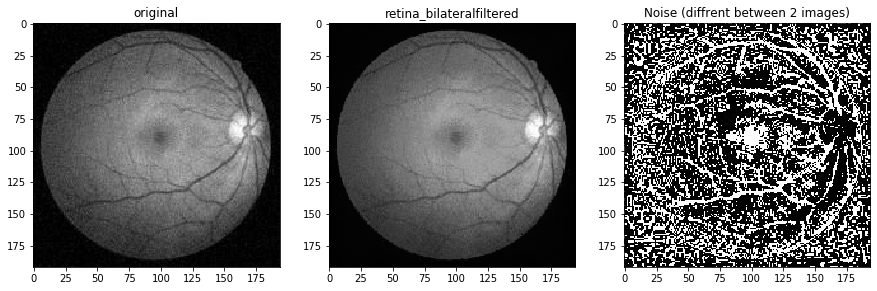

In [53]:
fig3 = plt.figure(figsize=(15, 7))

fig3.add_subplot(1, 3, 1)
plt.imshow(retina_noisy,cmap='gray')
plt.title("original")

fig3.add_subplot(1, 3, 2)
plt.imshow(bFiltered,cmap='gray')
plt.title("retina_bilateralfiltered")

noise2 = retina_noisy-bFiltered
fig3.add_subplot(1, 3, 3)
plt.imshow(noise2,cmap='gray')
plt.title("Noise (diffrent between 2 images)")

plt.show()

4. Choose three different parameter spatial std and range_std values and show the filtered images (overall 9 images).<br>
    Display the images in a grid where the spatial std is constant along the rows and the range std is constant along the columns. Add titles to the images. <br>
    The kernel_radius value can remain the same as in the previous section.

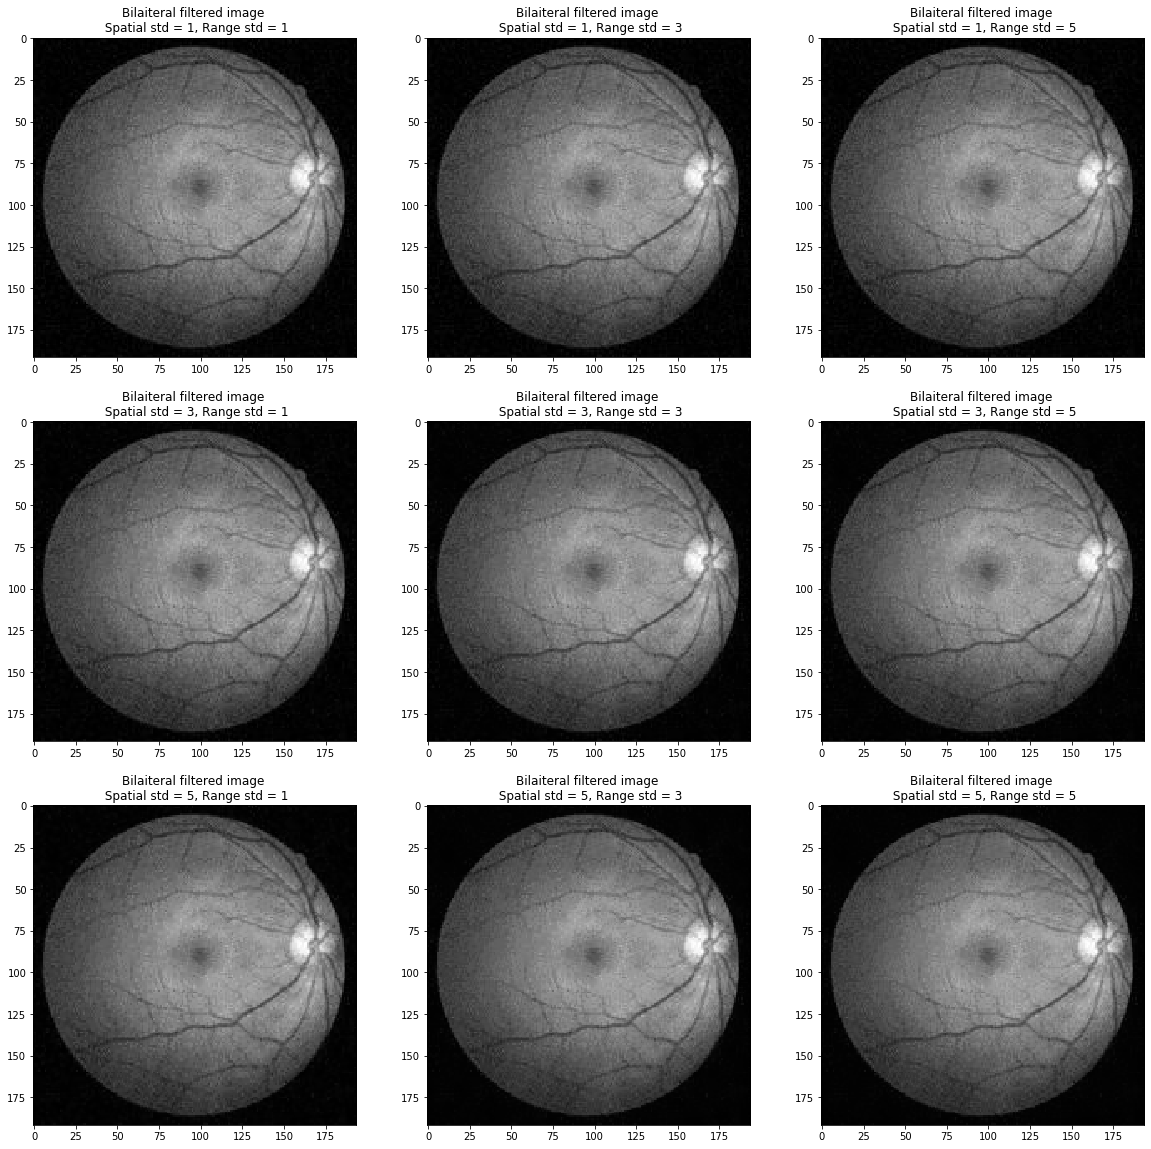

In [22]:
rng = [1,3,5]
spat = [1,3,5]


plt.figure(figsize=(20,20))
counter = 1
for i in range(3):
    for j in range(3):
        filtered = bilateral_filter(retina_noisy, 3*spat[i], rng[i], spat[j])
        plt.subplot(3,3,counter)
        plt.title(f"Bilaiteral filtered image \n Spatial std = {spat[i]}, Range std = {rng[j]}")
        plt.imshow(filtered,cmap = "gray")
        counter += 1

5. What are the benefits of using a bilateral filter instead of a Gaussian filter?

**Answer:**
bilateral filter is a filter that smooths images while preserving edges. while the Gaussian filter reduces the noise but loses the edges !
so the benifit is preserving the edges.